# CC3001 Otoño 2023 Tarea 5 Valentina Alarcón Yáñez

## ABBs posicionales

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Nelson Baloian •
Sección 3 Patricio Poblete



In [ ]:
!pip install aed-utilities

import aed_utilities as aed
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for aed-utilities: filename=aed_utilities-0.5.6-py3-none-any.whl size=4542 sha256=a7c73775b8443bd34fd8ff4d5f938044b51c33c4c425f4ea51859ad3967d056a
  Stored in directory: /root/.cache/pip/wheels/db/6d/39/cc766f956b1e504722228ad30c8154cd48f4470e7e24dcfd0e
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=fed6585dda72539a481361ee7017dad0286ff8edab22251db8a0c1f7e6f24af4
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built aed-utilities validators


## Introducción

Un *árbol de búsqueda binaria posicional* (*ABB posicional*) es un ABB modificado para que en cada nodo se agregue un campo adicional, que es un contador del número de llaves que hay en el subárbol que tiene a ese nodo como raíz, como se ve en el siguiente ejemplo:

![Ejemplo ABB posicional](https://www.dcc.uchile.cl/ppoblete/cc3001/ABBposicional.png)

Con esta información adicional, es posible, dado un valor de $k$, encontrar rápidamente el que sería el $k$-ésimo elemento, en un recorrido en inorden de izquierda a derecha ($k=1,\ldots,n$, donde $n$ es el número de llaves del árbol). Por ser un ABB, esto es lo mismo que encontrar el $k$-ésimo menor elemento del conjunto.

Llamaremos a esta operación ``find(k)``, la cual al ser ejecutada retorna un puntero al $k$-ésimo nodo interno, de izquierda a derecha. Si $k$ está fuera del rango $[1..n]$ se debe retornar ``None``.

Para implementar esta operación, comenzamos en la raíz y miramos el contador del hijo izquierdo. Si éste es mayor o igual que $k$, entonces el $k$-ésimo debe estar en el subárbol izquierdo, y lo seguimos buscando ahí recursivamente. Si $k$ es exactamente 1 más que el contador del hijo izquierdo, el elemento buscado es la raíz, así que retornamos un puntero a él. Por último, si no ha sido ninguno de los casos anteriores, el $k$-ésimo debe estar en el subárbol derecho, así que seguimos buscando ahí recursivamente. Pero, dentro de ese subárbol, el elemento buscado ya no es el $k$-ésimo, hay que restarle al $k$ una cantidad (¿cuánto?). Por ejemplo, si estábamos originalmente buscando el elemento con $k=5$, el que sería la llave "$62$", una vez que vamos a buscarlo dentro del subárbol derecho, dentro de ese árbol es el elemento con $k=2$.

## Objetivo de la tarea

Su trabajo consiste en implementar las clases ``Arbol``, ``Nodoi`` y ``Nodoe`` y los métodos ``insert``, ``search`` y ``find`` en todos lugares en donde corresponda (no se pide implementar ``delete``). Luego debe ejecutar los casos de prueba que se indica.

Note que la operación ``insert``, además de agregar la llave que se indica, debe modificar los contadores que sea necesario para que éstos reflejen correctamente los tamaños de los subárboles respectivos.

Esta tarea se puede resolver con recursividad o sin recursividad. Usted debe decidir cuál enfoque usar.

En el código que aparece a continuación usted debe agregar todo lo necesario para que la implementación esté completa.

_Nota_: El campo "``rep``" contiene la representación visual del nodo, que va a aparecer cuando se dibuje.

In [ ]:
from traitlets import ForwardDeclaredInstance
class Nodoi:
    def __init__(self, izq, info, contador, der):
        self.izq=izq
        self.info=info
        self.contador=contador
        self.der=der
        self.rep = str(info)+ ',' + str(contador)

    def insert(self,numero):
      assert numero!=self.info
      if numero<self.info:
        self.contador+=1
        self.rep = str(self.info)+ ',' + str(self.contador)
        return Nodoi(self.izq.insert(numero),self.info,self.contador,self.der)
      else:
        self.contador+=1
        self.rep = str(self.info)+ ',' + str(self.contador)
        return Nodoi(self.izq,self.info,self.contador,self.der.insert(numero))

    def search(self,numero):
        if numero==self.info:
            return self
        if numero<self.info:
            return self.izq.search(numero)
        else:
            return self.der.search(numero)

    def find(self,llave):
      if self.izq.contador>=llave:
        return self.izq.find(llave)
      elif self.izq.contador+1 == llave:
        print(self.info)
        print(self.contador)
        return self
      else:
        return self.der.find(llave-(self.izq.contador+1))


class Nodoe:
    def __init__(self,contador):
        self.contador=contador
        self.rep=contador

    def insert(self,numero):
      self.rep = str(self.contador)
      return Nodoi(Nodoe(0),numero,1,Nodoe(0))

    def search(self,numero):
      return None

    def find(self,llave):
      pass

class Arbol:
    def __init__(self,raiz=Nodoe(0)):
        self.raiz=raiz

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="rep", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")

    def insert(self,numero):
        #agrega el número en el lugar que corresponda
        #y actualiza los contadores
        self.raiz=self.raiz.insert(numero)

    def search(self,numero):
        return self.raiz.search(numero)


    def find(self,llave):
        return self.raiz.find(llave)

Las siguientes funciones son útiles para probar su implementación:

In [ ]:
def test_search(a,x):
    print(x, "está" if a.search(x) is not None else "no está")
def test_find(a,k):
    p=a.find(k)
    print("La k-ésima llave para k=",k, "es", p.info if p is not None else "fuera de rango")

## Prueba: Construir un árbol por inserciones sucesivas

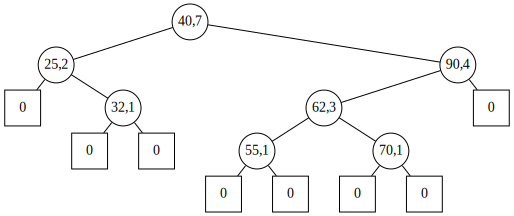

62 está
10 no está
62
3
La k-ésima llave para k= 5 es 62
La k-ésima llave para k= 8 es fuera de rango


In [ ]:
a=Arbol()
a.insert(40)
a.insert(25)
a.insert(32)
a.insert(90)
a.insert(62)
a.insert(55)
a.insert(70)
a.dibujar()
test_search(a,62)
test_search(a,10)
test_find(a,5)
test_find(a,8)

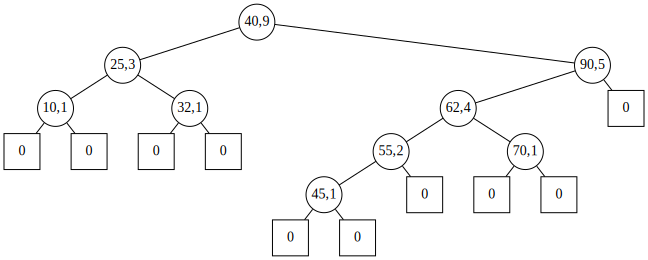

62 está
10 está
40 está
45
1
La k-ésima llave para k= 5 es 45
70
1
La k-ésima llave para k= 8 es 70
La k-ésima llave para k= 0 es fuera de rango
40
9
La k-ésima llave para k= 4 es 40


In [ ]:
a=Arbol()
a.insert(40)
a.insert(25)
a.insert(32)
a.insert(90)
a.insert(62)
a.insert(55)
a.insert(70)
a.insert(10)
a.insert(45)
a.dibujar()
test_search(a,62)
test_search(a,10)
test_search(a,40)
test_find(a,5)
test_find(a,8)
test_find(a,0)
test_find(a,4)

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.